In [5]:
DATASET_PATH = "/kaggle/input/tealeafagequality/dataset"

# YOLO v8n

In [6]:
# Create tealeaf.yaml file in the writable directory
yaml_content = f"""
# TeaLeafAgeQuality Dataset Configuration

path: {DATASET_PATH}  # Root path of the dataset
train: images/train
val: images/val
test: images/test

nc: 4
names: ['T1', 'T2', 'T3', 'T4']
"""

# Save the YAML file in the /kaggle/working directory
yaml_file_path = "/kaggle/working/tealeaf.yaml"
with open(yaml_file_path, "w") as file:
    file.write(yaml_content)

# Verify the content of the YAML file
print("YAML file created with the following content:")
with open(yaml_file_path, "r") as file:
    print(file.read())


YAML file created with the following content:

# TeaLeafAgeQuality Dataset Configuration

path: /kaggle/input/tealeafagequality/dataset  # Root path of the dataset
train: images/train
val: images/val
test: images/test

nc: 4
names: ['T1', 'T2', 'T3', 'T4']



In [7]:
!pip install ultralytics

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [8]:
from ultralytics import YOLO

# Load YOLOv8n and train
model = YOLO("yolov8n.pt")  # Load YOLOv8 Nano model
model.train(
    data="/kaggle/working/tealeaf.yaml",  # Path to dataset YAML
    epochs=50,
    imgsz=640,
    batch=16,
    lr0=0.01,
    label_smoothing=0.1,
    device=0                 # Use GPU (0 for the first GPU)
)

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/tealeaf.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

train: Scanning /kaggle/input/tealeafagequality/dataset/labels/train... 5298 images, 24 backgrounds, 0 corrupt: 100%|██████████| 5298/5298 [00:06<00:00, 865.83it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/tealeafagequality/dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/tealeafagequality/dataset/labels/val... 221 images, 3 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<00:00, 437.88it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/tealeafagequality/dataset/labels is not writeable, cache not saved.
Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.98G      1.222      2.407      1.626          4        640: 100%|██████████| 332/332 [00:57<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]


                   all        221        219      0.473      0.534      0.499       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.06G       1.16      1.691      1.531          3        640: 100%|██████████| 332/332 [00:54<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        221        219      0.533      0.646      0.622      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.07G       1.14      1.496      1.518          6        640: 100%|██████████| 332/332 [00:54<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.78it/s]

                   all        221        219      0.594      0.664      0.687      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.07G      1.085      1.367      1.473          7        640: 100%|██████████| 332/332 [00:52<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.16it/s]

                   all        221        219      0.707      0.722      0.723      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.07G      1.046      1.278      1.434          3        640: 100%|██████████| 332/332 [00:53<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.31it/s]

                   all        221        219      0.663      0.797      0.759      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.07G      1.007      1.212      1.403          3        640: 100%|██████████| 332/332 [00:53<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        221        219       0.76      0.705      0.783      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.07G     0.9689      1.156      1.375          5        640: 100%|██████████| 332/332 [00:52<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        221        219      0.736      0.716       0.76      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.07G     0.9495      1.086      1.356          4        640: 100%|██████████| 332/332 [00:53<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]

                   all        221        219      0.646       0.75      0.781      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.07G     0.9347      1.079      1.345          4        640: 100%|██████████| 332/332 [00:53<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]

                   all        221        219      0.789      0.673      0.776      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.07G     0.9108      1.028      1.326          5        640: 100%|██████████| 332/332 [00:52<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]

                   all        221        219      0.639      0.736      0.769      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.07G     0.8964      1.012      1.309          3        640: 100%|██████████| 332/332 [00:53<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]

                   all        221        219      0.798      0.761      0.794      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.07G     0.8716     0.9872      1.301          5        640: 100%|██████████| 332/332 [00:52<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all        221        219      0.789      0.718      0.802      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.07G     0.8643     0.9611      1.289          7        640: 100%|██████████| 332/332 [00:52<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]


                   all        221        219      0.686      0.725      0.748      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.07G     0.8522     0.9374      1.284          4        640: 100%|██████████| 332/332 [00:52<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.53it/s]

                   all        221        219      0.799      0.767      0.827       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.07G     0.8368     0.9171      1.268          5        640: 100%|██████████| 332/332 [00:53<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]

                   all        221        219      0.823      0.806      0.822      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.07G     0.8383     0.9061      1.269          3        640: 100%|██████████| 332/332 [00:52<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        221        219      0.759      0.774      0.814      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.07G     0.8216     0.8773      1.263          4        640: 100%|██████████| 332/332 [00:52<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.57it/s]

                   all        221        219      0.838      0.708      0.819      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.07G     0.8167     0.8612      1.257          4        640: 100%|██████████| 332/332 [00:52<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]

                   all        221        219      0.663      0.706      0.817      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.07G     0.7953      0.835      1.242          2        640: 100%|██████████| 332/332 [00:52<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]

                   all        221        219      0.823      0.773       0.82       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.07G     0.7972     0.8314      1.244          7        640: 100%|██████████| 332/332 [00:52<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        221        219      0.702      0.763      0.817      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.07G     0.7775     0.8148      1.233          4        640: 100%|██████████| 332/332 [00:53<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        221        219      0.746      0.719      0.789      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.07G      0.771     0.8042      1.219          3        640: 100%|██████████| 332/332 [00:52<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        221        219      0.808      0.619      0.809      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.07G      0.757     0.7849      1.219          5        640: 100%|██████████| 332/332 [00:52<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        221        219      0.907      0.631      0.803      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.07G     0.7582     0.7631      1.214          5        640: 100%|██████████| 332/332 [00:52<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        221        219      0.924      0.678      0.827      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.07G     0.7442     0.7475      1.205          3        640: 100%|██████████| 332/332 [00:52<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.24it/s]

                   all        221        219      0.893       0.78      0.841      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.07G     0.7403     0.7395      1.202          5        640: 100%|██████████| 332/332 [00:52<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.08it/s]

                   all        221        219      0.766      0.802      0.833      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.07G      0.728     0.7289      1.192          6        640: 100%|██████████| 332/332 [00:52<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        221        219      0.888      0.686       0.79      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.07G     0.7319     0.7238      1.197          3        640: 100%|██████████| 332/332 [00:52<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]

                   all        221        219      0.807      0.732      0.826       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.07G     0.7144     0.7057      1.187          6        640: 100%|██████████| 332/332 [00:53<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]

                   all        221        219      0.789      0.737      0.804      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.07G     0.7116     0.7169       1.19          5        640: 100%|██████████| 332/332 [00:52<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all        221        219      0.898      0.724      0.848      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.07G     0.7018     0.6843      1.177          5        640: 100%|██████████| 332/332 [00:53<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]

                   all        221        219      0.895      0.688       0.82      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.07G     0.7023     0.6803      1.177          4        640: 100%|██████████| 332/332 [00:52<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]

                   all        221        219      0.795      0.771      0.802      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.07G     0.6904     0.6551      1.167          6        640: 100%|██████████| 332/332 [00:52<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]

                   all        221        219      0.854      0.739      0.817      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.07G     0.6878     0.6576      1.167          7        640: 100%|██████████| 332/332 [00:52<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]

                   all        221        219      0.818      0.806      0.847      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.07G     0.6753     0.6371       1.16          5        640: 100%|██████████| 332/332 [00:52<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]

                   all        221        219      0.896      0.755      0.858      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.07G     0.6722     0.6278      1.159          6        640: 100%|██████████| 332/332 [00:52<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        221        219      0.924      0.695      0.838      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.07G     0.6669     0.6132      1.154          4        640: 100%|██████████| 332/332 [00:52<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        221        219      0.852      0.719      0.821      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.07G     0.6578     0.6174      1.149          4        640: 100%|██████████| 332/332 [00:53<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]

                   all        221        219      0.865       0.68       0.82      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.07G     0.6506     0.6045      1.146          4        640: 100%|██████████| 332/332 [00:52<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]

                   all        221        219      0.777      0.807      0.826      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.07G     0.6493     0.6034      1.143          2        640: 100%|██████████| 332/332 [00:52<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        221        219      0.778       0.81      0.833      0.652


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.07G      0.569     0.4407      1.151          2        640: 100%|██████████| 332/332 [00:53<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]

                   all        221        219      0.808      0.779      0.827       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.07G     0.5399     0.4157      1.126          2        640: 100%|██████████| 332/332 [00:52<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]

                   all        221        219      0.754      0.848      0.833      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.07G     0.5369     0.4001      1.124          2        640: 100%|██████████| 332/332 [00:51<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]

                   all        221        219      0.927      0.742      0.851      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.07G     0.5188     0.3763      1.108          2        640: 100%|██████████| 332/332 [00:51<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]

                   all        221        219      0.809      0.749      0.823      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.07G     0.5154     0.3713      1.095          2        640: 100%|██████████| 332/332 [00:51<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]

                   all        221        219      0.733      0.828      0.814      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.07G     0.5038     0.3633      1.092          2        640: 100%|██████████| 332/332 [00:51<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]

                   all        221        219       0.89      0.716      0.823      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.07G     0.5013     0.3544      1.088          2        640: 100%|██████████| 332/332 [00:51<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        221        219        0.8      0.809      0.837      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.07G     0.4906     0.3491      1.082          2        640: 100%|██████████| 332/332 [00:51<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.83it/s]

                   all        221        219      0.789      0.758      0.822      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.07G     0.4807     0.3282      1.075          2        640: 100%|██████████| 332/332 [00:51<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        221        219      0.761      0.814      0.827       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.07G     0.4825     0.3231      1.076          2        640: 100%|██████████| 332/332 [00:51<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        221        219      0.818      0.748      0.831      0.657



50 epochs completed in 0.762 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.3MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


                   all        221        219      0.897      0.755      0.858      0.665
                    T1         16         17      0.739      0.529      0.599      0.382
                    T3        101        101          1      0.766      0.991      0.795
                    T4        101        101      0.951       0.97      0.986      0.817
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7841038e66e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [9]:
results = model.val()
print(results)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/tealeafagequality/dataset/labels/val... 221 images, 3 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<00:00, 879.42it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/tealeafagequality/dataset/labels is not writeable, cache not saved.



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.81it/s]


                   all        221        219      0.896      0.755      0.858      0.665
                    T1         16         17      0.738      0.529      0.599      0.382
                    T3        101        101          1      0.766      0.991      0.795
                    T4        101        101      0.951       0.97      0.986      0.817
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train62
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7841023660e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,  


image 1/1 /kaggle/input/tealeafagequality/dataset/images/test/20231226_141705_jpg.rf.cb74bbc54ef4c280e86b7428f502515d.jpg: 640x640 1 T2, 9.2ms
Speed: 2.5ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


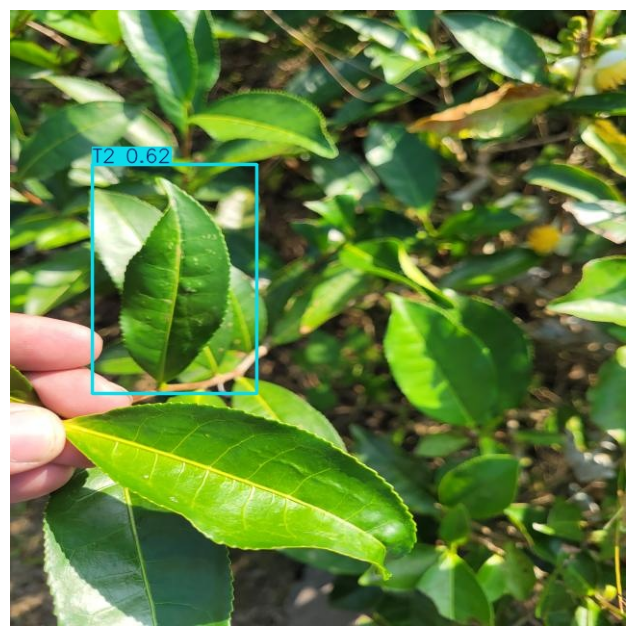

In [19]:
# Test image path
test_image_path = "/kaggle/input/tealeafagequality/dataset/images/test/20231226_141705_jpg.rf.cb74bbc54ef4c280e86b7428f502515d.jpg"

# Perform inference
results = model(test_image_path)

# Access the first result
result = results[0]

# Save annotated image to Kaggle working directory
output_image_path = "/kaggle/working/20231226_141705_jpg.rf.cb74bbc54ef4c280e86b7428f502515d_annotated.jpg"
result.save(filename=output_image_path)  # Specify the full filename directly

# Load and display the saved image using matplotlib and OpenCV
import matplotlib.pyplot as plt
import cv2

# Load the saved annotated image
img = cv2.imread(output_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

# Plot the image
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()


In [24]:
# Check the available columns in the results dataframe
print(results.columns)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


Training metrics loaded successfully!
   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   63.2158         1.20626         2.39647         1.61478   
1      2  119.5080         1.16051         1.68737         1.53936   
2      3  173.8980         1.15345         1.51711         1.52062   
3      4  229.1610         1.10467         1.38342         1.48342   
4      5  284.2150         1.05273         1.28822         1.43730   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.28847            0.50500           0.38340   
1               0.56078            0.71917           0.61693   
2               0.56186            0.57776           0.61423   
3               0.69145            0.75410           0.75925   
4               0.65097            0.64887           0.73214   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.20240       1.46317       3.07266       2.10542  0.000415   


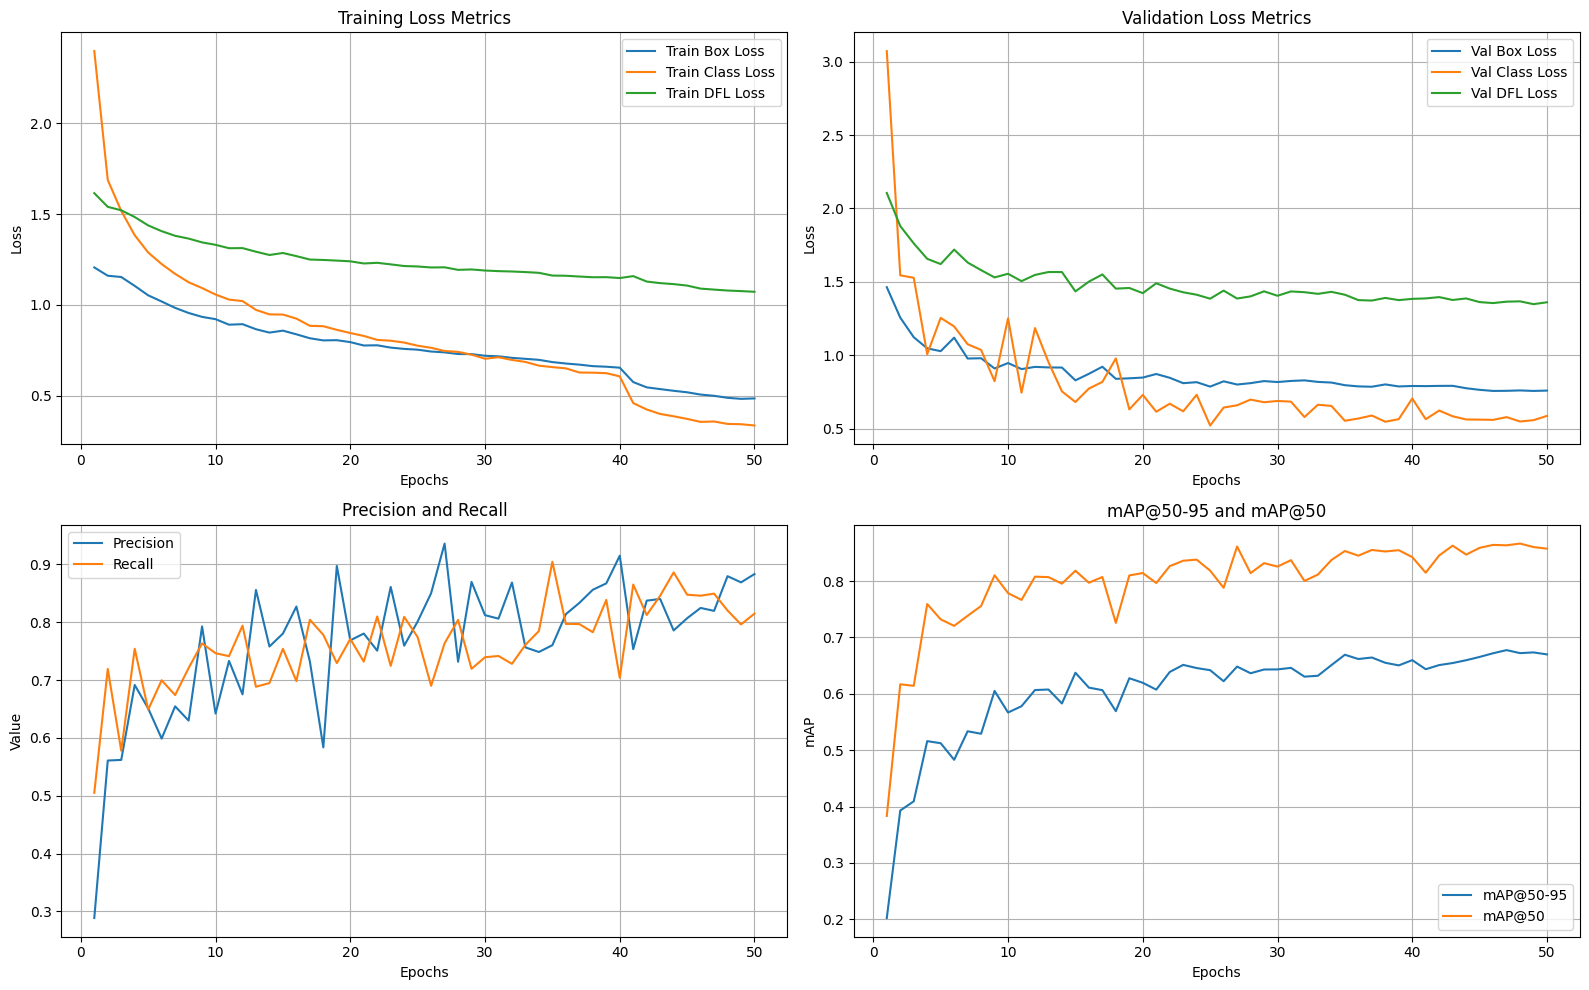

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to training results (adjust if different)
results_path = 'runs/detect/train/results.csv'

# Load training metrics
if os.path.exists(results_path):
    results = pd.read_csv(results_path)
    print("Training metrics loaded successfully!")
else:
    print("Training results not found.")

# Display first few rows to understand the structure
print(results.head())

# Plot key metrics
plt.figure(figsize=(16, 10))

# Loss Plot
plt.subplot(2, 2, 1)
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss')
plt.plot(results['epoch'], results['train/cls_loss'], label='Train Class Loss')
plt.plot(results['epoch'], results['train/dfl_loss'], label='Train DFL Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Metrics')
plt.legend()
plt.grid()

# Validation Loss Plot
plt.subplot(2, 2, 2)
plt.plot(results['epoch'], results['val/box_loss'], label='Val Box Loss')
plt.plot(results['epoch'], results['val/cls_loss'], label='Val Class Loss')
plt.plot(results['epoch'], results['val/dfl_loss'], label='Val DFL Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss Metrics')
plt.legend()
plt.grid()

# Precision and Recall Plot
plt.subplot(2, 2, 3)
plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision')
plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Precision and Recall')
plt.legend()
plt.grid()

# mAP@50-95 and mAP@50 Plot
plt.subplot(2, 2, 4)
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@50-95')
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.title('mAP@50-95 and mAP@50')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# ViT model

In [100]:
# Import libraries
import os
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import ViTForImageClassification, ViTImageProcessor
from PIL import Image


In [101]:
# Define dataset paths
DATASET_PATH = "/kaggle/input/tealeafagequality/dataset"
IMAGE_DIR = os.path.join(DATASET_PATH, "images")
LABEL_DIR = os.path.join(DATASET_PATH, "labels")


In [102]:
# Validate paths
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"Dataset path {DATASET_PATH} not found.")
if not os.path.isdir(IMAGE_DIR) or not os.path.isdir(LABEL_DIR):
    raise ValueError("Ensure 'images' and 'labels' directories exist under DATASET_PATH.")


In [103]:
# Map categories to labels
CATEGORY_MAPPING = {"T1": 0, "T2": 1, "T3": 2, "T4": 3}

In [104]:
# Dataset class
class TeaLeafDataset(Dataset):
    def __init__(self, image_paths, labels, feature_extractor):
        self.image_paths = image_paths
        self.labels = labels
        self.feature_extractor = feature_extractor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        # Load and process image using feature extractor
        image = Image.open(image_path).convert("RGB")
        image = self.feature_extractor(images=image, return_tensors="pt")["pixel_values"].squeeze(0)

        return image, label


In [105]:
# Load and preprocess data
def load_data(data_dir):
    train_paths, train_labels = [], []
    val_paths, val_labels = [], []

    for phase in ["train", "val"]:
        phase_dir = os.path.join(data_dir, phase)
        for label_file in os.listdir(os.path.join(LABEL_DIR, phase)):
            label_path = os.path.join(LABEL_DIR, phase, label_file)

            # Parse YOLO label
            with open(label_path, "r") as file:
                lines = file.readlines()
                if lines:
                    class_id = int(lines[0].split()[0])  # Extract class ID
                    label = class_id  # Use class ID as label

                    # Find corresponding image file
                    image_file = label_file.replace(".txt", ".jpg")
                    image_path = os.path.join(phase_dir, image_file)

                    # Append to appropriate dataset
                    if os.path.exists(image_path):
                        if phase == "train":
                            train_paths.append(image_path)
                            train_labels.append(label)
                        elif phase == "val":
                            val_paths.append(image_path)
                            val_labels.append(label)

    return train_paths, val_paths, train_labels, val_labels


In [106]:
# Define feature extractor
image_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")


In [107]:
# Load data
train_images, val_images, train_labels, val_labels = load_data(IMAGE_DIR)


In [108]:
# Create datasets and loaders
train_dataset = TeaLeafDataset(train_images, train_labels, image_processor)
val_dataset = TeaLeafDataset(val_images, val_labels, image_processor)

BATCH_SIZE = 16
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [109]:
# Define the model
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k", num_labels=len(CATEGORY_MAPPING)
)
model = model.to("cuda")


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [110]:
# Training setup
EPOCHS = 10
LEARNING_RATE = 5e-5
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
criterion = torch.nn.CrossEntropyLoss()


In [111]:
import matplotlib.pyplot as plt

# Initialize lists to track losses and accuracy
train_losses = []
val_losses = []
val_accuracies = []

# Training loop with metrics tracking
for epoch in range(EPOCHS):
    # Training phase
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to("cuda"), labels.to("cuda")
        optimizer.zero_grad()
        outputs = model(images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_losses.append(train_loss / len(train_loader))

    # Validation phase
    model.eval()
    val_loss = 0.0
    preds, true_labels = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to("cuda"), labels.to("cuda")
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds.extend(torch.argmax(outputs, axis=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    val_losses.append(val_loss / len(val_loader))
    val_accuracy = accuracy_score(true_labels, preds)
    val_accuracies.append(val_accuracy)

    # Print metrics for the epoch
    print(f"Epoch {epoch+1}/{EPOCHS}")
    print(f"  Train Loss: {train_losses[-1]:.4f}")
    print(f"  Validation Loss: {val_losses[-1]:.4f}")
    print(f"  Validation Accuracy: {val_accuracy:.4f}")




Epoch 1/10
  Train Loss: 0.4355
  Validation Loss: 0.3550
  Validation Accuracy: 0.8670
Epoch 2/10
  Train Loss: 0.1244
  Validation Loss: 0.3195
  Validation Accuracy: 0.8991
Epoch 3/10
  Train Loss: 0.0523
  Validation Loss: 0.2977
  Validation Accuracy: 0.9083
Epoch 4/10
  Train Loss: 0.0405
  Validation Loss: 0.2577
  Validation Accuracy: 0.9312
Epoch 5/10
  Train Loss: 0.0225
  Validation Loss: 0.4049
  Validation Accuracy: 0.8945
Epoch 6/10
  Train Loss: 0.0380
  Validation Loss: 0.3453
  Validation Accuracy: 0.9174
Epoch 7/10
  Train Loss: 0.0099
  Validation Loss: 0.4325
  Validation Accuracy: 0.8899
Epoch 8/10
  Train Loss: 0.0358
  Validation Loss: 0.2875
  Validation Accuracy: 0.9312
Epoch 9/10
  Train Loss: 0.0029
  Validation Loss: 0.3382
  Validation Accuracy: 0.9174
Epoch 10/10
  Train Loss: 0.0020
  Validation Loss: 0.3326
  Validation Accuracy: 0.9220


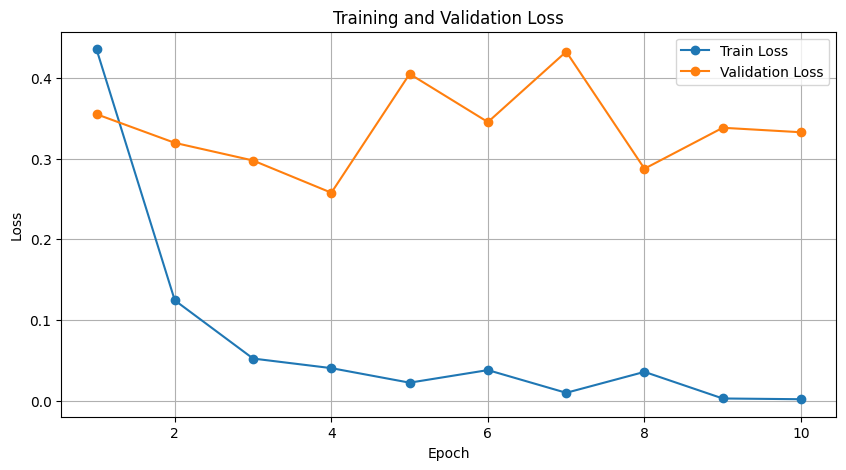

In [112]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, EPOCHS + 1), train_losses, label="Train Loss", marker="o")
plt.plot(range(1, EPOCHS + 1), val_losses, label="Validation Loss", marker="o")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


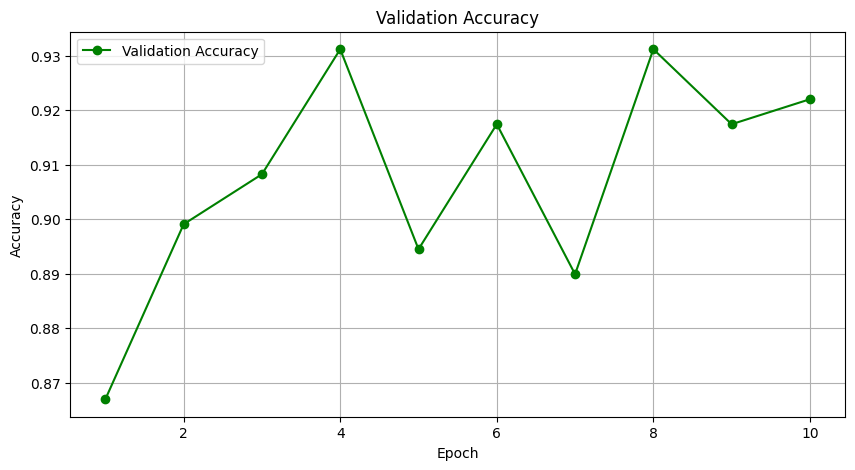

In [113]:
# Plot validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, EPOCHS + 1), val_accuracies, label="Validation Accuracy", marker="o", color="green")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()
